# The Poetry Project

In the previous notebook I have applied linear regression to my poetry data. It became clear that a linear regression model wasn't a good fit for my dataset. Therefore, in this notebook, I want to use the K-means algorithm for my dataset. The aim is to gain more knowledge about the correlation that exists between the variable "Meditation" and the values for "totalwords all poems".

### Contents of this notebook
#### 1. Importing libraries
#### 2. Importing dataframe
#### 3. Data imputation
#### 4. The elbow technique
#### 5. K-means clustering
#### 6. Exporting the dataframe

### 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Importing the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures that the graphs created are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

### 2. Importing dataframe

In [3]:
poetry = pd.read_excel(r'C:\Users\veren\Python Data\persoenliche-projekte\The Poetry Project\02 Data\Prepared Data\poetry-project-data-complete-medcat.xlsx', index_col=False)

In [4]:
poetry.head()

,Unnamed: 0,Date,Day of the week,Weather,Food,Sport,Meditation,Dance,Music,Kind of music,...,cleaned poem,cleaned additional poem 1,cleaned additional poem 2,totalwords poem,totalwords additional poem 1,totalwords additional poem 2,totalwords all poems,all poems together,no of poems per day,meditation length category
0,0,2021-08-06,Friday,sunny,fresh,0.0,30,0,20,classical,...,It slithers Leaves from my chest When the sun ...,0,0,28,0,0,28,It slithers Leaves from my chest When the sun ...,1,medium meditation
1,1,2021-08-07,Saturday,cloudy,fresh,20.0,60,20,0,0,...,The touch of your skin Is a meandering Forest ...,The night sky is lingering Over the chest of ...,Let me blow the horn of vastness For you and ...,11,38,42,91,The touch of your skin Is a meandering Forest ...,3,long meditation
2,2,2021-08-08,Sunday,cloudy,fresh,0.0,60,0,0,eclectic,...,0,0,0,0,0,0,0,0 0 0,0,long meditation
3,3,2021-08-09,Monday,cloudy,fresh,0.0,30,0,0,0,...,0,0,0,0,0,0,0,0 0 0,0,medium meditation
4,4,2021-08-10,Tuesday,cloudy,fresh,0.0,60,0,0,0,...,The deep yearning to learn something about you...,0,0,13,0,0,13,The deep yearning to learn something about you...,1,long meditation


In [5]:
# Dropping the index column

poetry.drop(poetry.columns[0], axis = 1, inplace = True)

In [6]:
pd.options.display.max_columns = None
poetry.head(91)

,Date,Day of the week,Weather,Food,Sport,Meditation,Dance,Music,Kind of music,Guitar,Reading,Type of reading,Mood in the evening,sleep quality night before,mindfulness,poem,additional poem 1,additional poem 2,cleaned poem,cleaned additional poem 1,cleaned additional poem 2,totalwords poem,totalwords additional poem 1,totalwords additional poem 2,totalwords all poems,all poems together,no of poems per day,meditation length category
0,2021-08-06,Friday,sunny,fresh,0.0,30,0,20,classical,0,0.0,0,1,0,1,It slithers\nLeaves from my chest\nWhen the su...,0,0,It slithers Leaves from my chest When the sun ...,0,0,28,0,0,28,It slithers Leaves from my chest When the sun ...,1,medium meditation
1,2021-08-07,Saturday,cloudy,fresh,20.0,60,20,0,0,0,30.0,biographical,5,0,10,The touch of your skin\nIs a meandering\nFores...,The night sky is lingering \nOver the chest of...,Let me blow the horn of vastness \nFor you and...,The touch of your skin Is a meandering Forest ...,The night sky is lingering Over the chest of ...,Let me blow the horn of vastness For you and ...,11,38,42,91,The touch of your skin Is a meandering Forest ...,3,long meditation
2,2021-08-08,Sunday,cloudy,fresh,0.0,60,0,0,eclectic,0,0.0,0,10,0,10,0,0,0,0,0,0,0,0,0,0,0 0 0,0,long meditation
3,2021-08-09,Monday,cloudy,fresh,0.0,30,0,0,0,0,0.0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0 0 0,0,medium meditation
4,2021-08-10,Tuesday,cloudy,fresh,0.0,60,0,0,0,0,0.0,NaN,5,0,10,The deep yearning\nto learn something about yo...,0,0,The deep yearning to learn something about you...,0,0,13,0,0,13,The deep yearning to learn something about you...,1,long meditation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2021-10-31,Sunday,sunny,fresh,0.0,30,0,0,0,0,180.0,fiction,10,5,10,0,0,0,0,0,0,0,0,0,0,0 0 0,0,medium meditation
87,2021-11-01,Monday,cloudy,fresh,30.0,30,0,0,0,0,0.0,0,10,10,10,0,0,0,0,0,0,0,0,0,0,0 0 0,0,medium meditation
88,2021-11-02,Tuesday,cloudy,fresh,40.0,30,0,0,0,0,0.0,fiction,10,10,10,0,0,0,0,0,0,0,0,0,0,0 0 0,0,medium meditation
89,2021-11-03,Wednesday,cloudy,fresh,30.0,30,0,0,0,0,40.0,0,10,10,10,0,0,0,0,0,0,0,0,0,0,0 0 0,0,medium meditation


In [7]:
poetry.shape

(91, 28)

### 3. Data imputation

In [8]:
# Dropping all columns with categorical values

df = poetry.drop(columns = ['Date', 'Day of the week', 'Weather', 'Food', 'Kind of music', 'Type of reading', 'poem', 'additional poem 1', 'additional poem 2', 'cleaned poem', 'cleaned additional poem 1', 'cleaned additional poem 2', 'all poems together', 'meditation length category'])

In [9]:
df.head()

,Sport,Meditation,Dance,Music,Guitar,Reading,Mood in the evening,sleep quality night before,mindfulness,totalwords poem,totalwords additional poem 1,totalwords additional poem 2,totalwords all poems,no of poems per day
0,0.0,30,0,20,0,0.0,1,0,1,28,0,0,28,1
1,20.0,60,20,0,0,30.0,5,0,10,11,38,42,91,3
2,0.0,60,0,0,0,0.0,10,0,10,0,0,0,0,0
3,0.0,30,0,0,0,0.0,0,0,10,0,0,0,0,0
4,0.0,60,0,0,0,0.0,5,0,10,13,0,0,13,1


In [10]:
# Checking for missing values

df.isnull().sum()

Sport                           1
Meditation                      0
Dance                           0
Music                           0
Guitar                          0
Reading                         5
Mood in the evening             0
sleep quality night before      0
mindfulness                     0
totalwords poem                 0
totalwords additional poem 1    0
totalwords additional poem 2    0
totalwords all poems            0
no of poems per day             0
dtype: int64

In [11]:
# Imputing the missing values for "Sport" with the median

df['Sport'].fillna(df['Sport'].median(), inplace=True)

In [12]:
# Imputing the missing values for "Reading" with the median

df['Reading'].fillna(df['Reading'].median(), inplace=True)

In [13]:
# Checking for missing values again

df.isnull().sum()

Sport                           0
Meditation                      0
Dance                           0
Music                           0
Guitar                          0
Reading                         0
Mood in the evening             0
sleep quality night before      0
mindfulness                     0
totalwords poem                 0
totalwords additional poem 1    0
totalwords additional poem 2    0
totalwords all poems            0
no of poems per day             0
dtype: int64

In [14]:
# Checking the datatypes

df.dtypes

Sport                           float64
Meditation                        int64
Dance                             int64
Music                             int64
Guitar                            int64
Reading                         float64
Mood in the evening               int64
sleep quality night before        int64
mindfulness                       int64
totalwords poem                   int64
totalwords additional poem 1      int64
totalwords additional poem 2      int64
totalwords all poems              int64
no of poems per day               int64
dtype: object

In [15]:
# Changing the datatypes of "Sport" and "Reading" into integers

df['Sport']=df['Sport'].astype('int64')

In [16]:
df['Reading']=df['Reading'].astype('int64')

In [17]:
# Checking the datatypes again

df.dtypes

Sport                           int64
Meditation                      int64
Dance                           int64
Music                           int64
Guitar                          int64
Reading                         int64
Mood in the evening             int64
sleep quality night before      int64
mindfulness                     int64
totalwords poem                 int64
totalwords additional poem 1    int64
totalwords additional poem 2    int64
totalwords all poems            int64
no of poems per day             int64
dtype: object

### 4. The elbow technique

In [18]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [19]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\veren\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[-258802.35164835164,
 -190544.32740447955,
 -156695.6027667984,
 -125552.59986824772,
 -104241.94307359308,
 -90923.00769230768,
 -76205.74600202429,
 -65409.89958521871,
 -60783.68803418803]

In [20]:
omp_num_threads=1

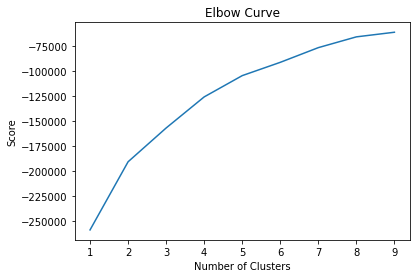

In [21]:
# Plotting the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

An elbow curve is sometimes hard to read but I am going with 2 clusters from this one.

### 5. K-means clustering

In [22]:
# Creating the k-means object.

kmeans = KMeans(n_clusters = 2) 

In [23]:
# Fiting the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=2)

In [24]:
df['clusters'] = kmeans.fit_predict(df)

In [25]:
# Checking for the column "clusters"

df.head()

,Sport,Meditation,Dance,Music,Guitar,Reading,Mood in the evening,sleep quality night before,mindfulness,totalwords poem,totalwords additional poem 1,totalwords additional poem 2,totalwords all poems,no of poems per day,clusters
0,0,30,0,20,0,0,1,0,1,28,0,0,28,1,1
1,20,60,20,0,0,30,5,0,10,11,38,42,91,3,1
2,0,60,0,0,0,0,10,0,10,0,0,0,0,0,1
3,0,30,0,0,0,0,0,0,10,0,0,0,0,0,1
4,0,60,0,0,0,0,5,0,10,13,0,0,13,1,1


In [26]:
df['clusters'].value_counts()

1    69
0    22
Name: clusters, dtype: int64

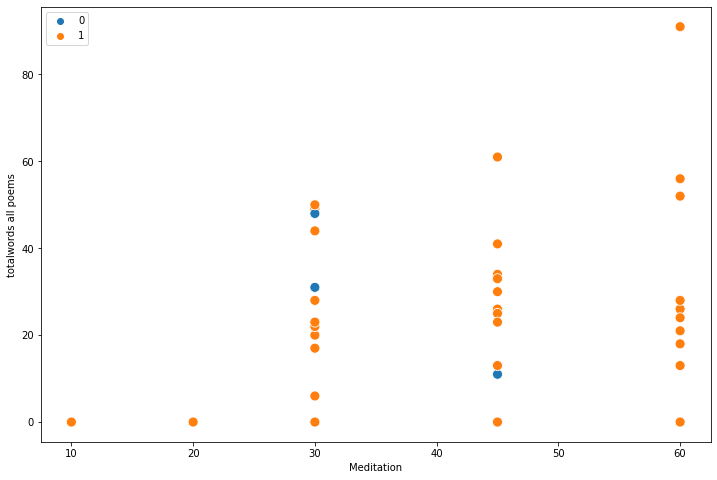

In [27]:
# Plotting the clusters for the "Meditation" and "totalwords all poems" variables.
# These variables showed the strongest correlation in the explorative data analysis.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Meditation'], y=df['totalwords all poems'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Meditation') # Label x-axis.
plt.ylabel('totalwords all poems') # Label y-axis.
plt.show()

This plot shows that clustering with the K-means algorith doesn't make a lot of sense here. Clustering is about checking if data points are grouped around similar central points (centroids). In this plot, one can see that the data points don't show this structure of groups around central values.

In [28]:
df.groupby('clusters').agg({'totalwords all poems':['mean', 'median'],
                           'Meditation' :['mean', 'median']})

totalwords all poems        Meditation       
                         mean median       mean median
clusters                                              
0                    6.590909    0.0  34.090909   30.0
1                   13.000000    0.0  40.217391   45.0

This table further illustrates that there is a huge difference between the values of both variables.

### 6. Exporting the dataframe

In [29]:
path = r'C:\Users\veren\Python Data\persoenliche-projekte\The Poetry Project'

In [30]:
poetry.to_excel(os.path.join(path, '02 Data', 'Prepared Data', 'poetry-project-data-clusters.xlsx'))

Wow, this data analysis of my poetry data was really exciting up to this point. I couldn't really find out more about the correlation between meditation and the total wordcount in my poems but I learned a lot applying two different sets of logic, linear regression and clustering, to my data. 